Predicting student Dropout/Success Rate

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly as px
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor, VotingClassifier
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.neural_network import MLPRegressor
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm

In [2]:
# Importing the data
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# Fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# Data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

In [3]:
df = pd.concat([X, y], axis=1)

In [4]:
# Variable information 
print(predict_students_dropout_and_academic_success.variables) 

                                              name     role         type  \
0                                   Marital Status  Feature      Integer   
1                                 Application mode  Feature      Integer   
2                                Application order  Feature      Integer   
3                                           Course  Feature      Integer   
4                       Daytime/evening attendance  Feature      Integer   
5                           Previous qualification  Feature      Integer   
6                   Previous qualification (grade)  Feature   Continuous   
7                                      Nacionality  Feature      Integer   
8                           Mother's qualification  Feature      Integer   
9                           Father's qualification  Feature      Integer   
10                             Mother's occupation  Feature      Integer   
11                             Father's occupation  Feature      Integer   
12          

In [4]:
#Renaming specific columns to make calling on them later to make predictions

df = df.rename(columns={'Marital Status': 'Marital_Status', 'Application mode': 'Application_Mode'})
df = df.rename(columns={'Application order': 'Application_Order', 'Previous qualification': 'Prev_Qual'})
df = df.rename(columns={'Daytime/evening attendance': 'Attendance', 'Previous qualification (grade)': 'Prev_Qual_Grade'})
df = df.rename(columns={'Nacionality': 'Nationality',"Mother's qualification": 'Mom_Qual', "Father's qualification": 'Dad_Qual'})
df = df.rename(columns={"Mother's occupation": 'Mom_Occ', "Father's occupation": 'Dad_Occ'})
df = df.rename(columns={"Admission grade": 'Admission_Grade', "Educational special needs": 'Edu_Needs'})
df = df.rename(columns={"Tuition fees up to date": 'Tuition_Date', "Scholarship holder": 'Scholarship', "Age at enrollment": 'Age'})
df = df.rename(columns={'Curricular units 1st sem (credited)': 'CU_1_Credited', 'Curricular units 1st sem (enrolled)':'CU_1_Enrolled'})
df = df.rename(columns={'Curricular units 1st sem (evaluations)': 'CU_1_Eval', 'Curricular units 1st sem (approved)': 'CU_1_Appr'})
df = df.rename(columns={'Curricular units 1st sem (grade)': 'CU_1_Grade', 'Curricular units 1st sem (without evaluations)': 'CU_1_Without_Eval'})
df = df.rename(columns={'Curricular units 2nd sem (credited)': 'CU_2_Credited', 'Curricular units 2nd sem (enrolled)':'CU_2_Enrolled'})
df = df.rename(columns={'Curricular units 2nd sem (evaluations)': 'CU_2_Eval', 'Curricular units 2nd sem (approved)':'CU_2_Appr'})
df = df.rename(columns={'Curricular units 2nd sem (grade)': 'CU_2_Grade', 'Curricular units 2nd sem (without evaluations)': 'CU_2_Without_Eval'})
df = df.rename(columns={'Unemployment rate': 'Unemployment_Rate', 'Inflation rate': 'Inflation_Rate'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Marital_Status     4424 non-null   int64  
 1   Application_Mode   4424 non-null   int64  
 2   Application_Order  4424 non-null   int64  
 3   Course             4424 non-null   int64  
 4   Attendance         4424 non-null   int64  
 5   Prev_Qual          4424 non-null   int64  
 6   Prev_Qual_Grade    4424 non-null   float64
 7   Nationality        4424 non-null   int64  
 8   Mom_Qual           4424 non-null   int64  
 9   Dad_Qual           4424 non-null   int64  
 10  Mom_Occ            4424 non-null   int64  
 11  Dad_Occ            4424 non-null   int64  
 12  Admission_Grade    4424 non-null   float64
 13  Displaced          4424 non-null   int64  
 14  Edu_Needs          4424 non-null   int64  
 15  Debtor             4424 non-null   int64  
 16  Tuition_Date       4424 

In [5]:
df.columns

Index(['Marital_Status', 'Application_Mode', 'Application_Order', 'Course',
       'Attendance', 'Prev_Qual', 'Prev_Qual_Grade', 'Nationality', 'Mom_Qual',
       'Dad_Qual', 'Mom_Occ', 'Dad_Occ', 'Admission_Grade', 'Displaced',
       'Edu_Needs', 'Debtor', 'Tuition_Date', 'Gender', 'Scholarship', 'Age',
       'International', 'CU_1_Credited', 'CU_1_Enrolled', 'CU_1_Eval',
       'CU_1_Appr', 'CU_1_Grade', 'CU_1_Without_Eval', 'CU_2_Credited',
       'CU_2_Enrolled', 'CU_2_Eval', 'CU_2_Appr', 'CU_2_Grade',
       'CU_2_Without_Eval', 'Unemployment_Rate', 'Inflation_Rate', 'GDP',
       'Target'],
      dtype='object')

In [6]:
# Checking for duplicate rows
df.duplicated().sum()

0

In [7]:
# Checking for missing values
df.isnull().sum()

Marital_Status       0
Application_Mode     0
Application_Order    0
Course               0
Attendance           0
Prev_Qual            0
Prev_Qual_Grade      0
Nationality          0
Mom_Qual             0
Dad_Qual             0
Mom_Occ              0
Dad_Occ              0
Admission_Grade      0
Displaced            0
Edu_Needs            0
Debtor               0
Tuition_Date         0
Gender               0
Scholarship          0
Age                  0
International        0
CU_1_Credited        0
CU_1_Enrolled        0
CU_1_Eval            0
CU_1_Appr            0
CU_1_Grade           0
CU_1_Without_Eval    0
CU_2_Credited        0
CU_2_Enrolled        0
CU_2_Eval            0
CU_2_Appr            0
CU_2_Grade           0
CU_2_Without_Eval    0
Unemployment_Rate    0
Inflation_Rate       0
GDP                  0
Target               0
dtype: int64

In [8]:
# Target Variable Encoding
print(df["Target"].unique())

['Dropout' 'Graduate' 'Enrolled']


So there are 3 unique values in target column which we can replace by

Graduate - 0

Enrolled - 1

Dropout - 2

In [9]:
df['Target'] = df['Target'].map({
    'Graduate': 0,
    'Enrolled': 1,
    'Dropout': 2
})

print(df["Target"].unique())

[2 0 1]


Exploratory Data Analysis (EDA) involves examining and visualizing the dataset to gain insights into its characteristics

In [10]:
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,Marital_Status,Application_Mode,Application_Order,Course,Attendance,Prev_Qual,Prev_Qual_Grade,Nationality,Mom_Qual,Dad_Qual,...,CU_2_Credited,CU_2_Enrolled,CU_2_Eval,CU_2_Appr,CU_2_Grade,CU_2_Without_Eval,Unemployment_Rate,Inflation_Rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,2
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,2
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


In [11]:
# Summary statistics of numerical features
print("\nSummary statistics of numerical features:")
df.describe()


Summary statistics of numerical features:


,Marital_Status,Application_Mode,Application_Order,Course,Attendance,Prev_Qual,Prev_Qual_Grade,Nationality,Mom_Qual,Dad_Qual,...,CU_2_Credited,CU_2_Enrolled,CU_2_Eval,CU_2_Appr,CU_2_Grade,CU_2_Without_Eval,Unemployment_Rate,Inflation_Rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,0.821881
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


In [12]:
df['Target'].value_counts()

Target
0    2209
2    1421
1     794
Name: count, dtype: int64

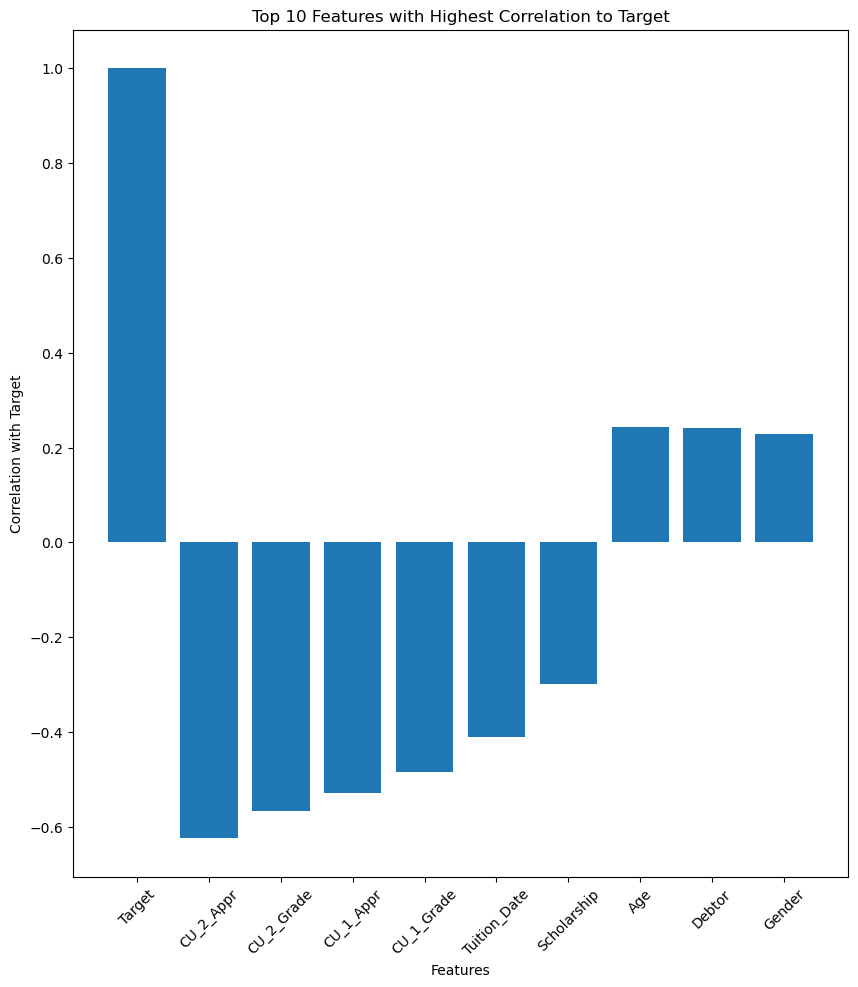

In [13]:
correlations = df.corr()['Target']
top_10_features = correlations.abs().nlargest(10).index
top_10_corr_values = correlations[top_10_features]

plt.figure(figsize=(10, 11))
plt.bar(top_10_features, top_10_corr_values)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Top 10 Features with Highest Correlation to Target')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Define categorical and numerical features

numerical_features = ["Age", "Prev_Qual_Grade", "Admission_Grade", 'CU_1_Credited',
       'CU_1_Enrolled', 'CU_1_Eval', 'CU_1_Appr', 'CU_1_Grade',
       'CU_1_Without_Eval', 'CU_2_Credited', 'CU_2_Enrolled', 'CU_2_Eval',
       'CU_2_Appr', 'CU_2_Grade', 'CU_2_Without_Eval', 'Unemployment_Rate',
       'Inflation_Rate', 'GDP']

categorical_features = df.columns.difference(numerical_features)

In [15]:
# Data Pre-processing 
# Creating a Pipeling for Encoding and Scaling to ensure that the transformations are applied consistently to both the training and testing sets 

# Define the target variable and features
X = df.drop(['Target'], axis=1)
y = df['Target']

In [16]:
# Split the data into training (80%) and temporary (20%)
X_train, X_holdout_temp, y_train, y_holdout_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the temporary data into holdout (10%) and testing (10%)
X_holdout, X_val_temp, y_holdout, y_val_temp = train_test_split(X_holdout_temp, y_holdout_temp, test_size=0.5, random_state=42)

# Further split the temporary data into testing (5%) and validation (5%)
X_test, X_val, y_test, y_val = train_test_split(X_val_temp, y_val_temp, test_size=0.5, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))
print("Validation set size:", len(X_val))
print("Holdout set size:", len(X_holdout))

Training set size: 3539
Testing set size: 221
Validation set size: 222
Holdout set size: 442


In [17]:
# Baseline Model

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Fit the model on the original training data
logreg_model.fit(X_train, y_train)

# Make predictions on the original test set
y_pred = logreg_model.predict(X_test)

# Evaluate model accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)

Model Accuracy: 0.6244
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.94      0.74       104
           1       0.33      0.02      0.04        49
           2       0.68      0.57      0.62        68

    accuracy                           0.62       221
   macro avg       0.54      0.51      0.47       221
weighted avg       0.57      0.62      0.55       221



/Applications/miniconda3/envs/ml-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# Initialize the StandardScaler for feature scaling
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Fit the model on the scaled training data
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate model accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)

Model Accuracy: 0.7421
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.91      0.82       104
           1       0.59      0.39      0.47        49
           2       0.82      0.74      0.78        68

    accuracy                           0.74       221
   macro avg       0.72      0.68      0.69       221
weighted avg       0.73      0.74      0.73       221



Feature Selection
1. Find which features are most correlated with the target
2. Remove the unwanted or irrelevant features 

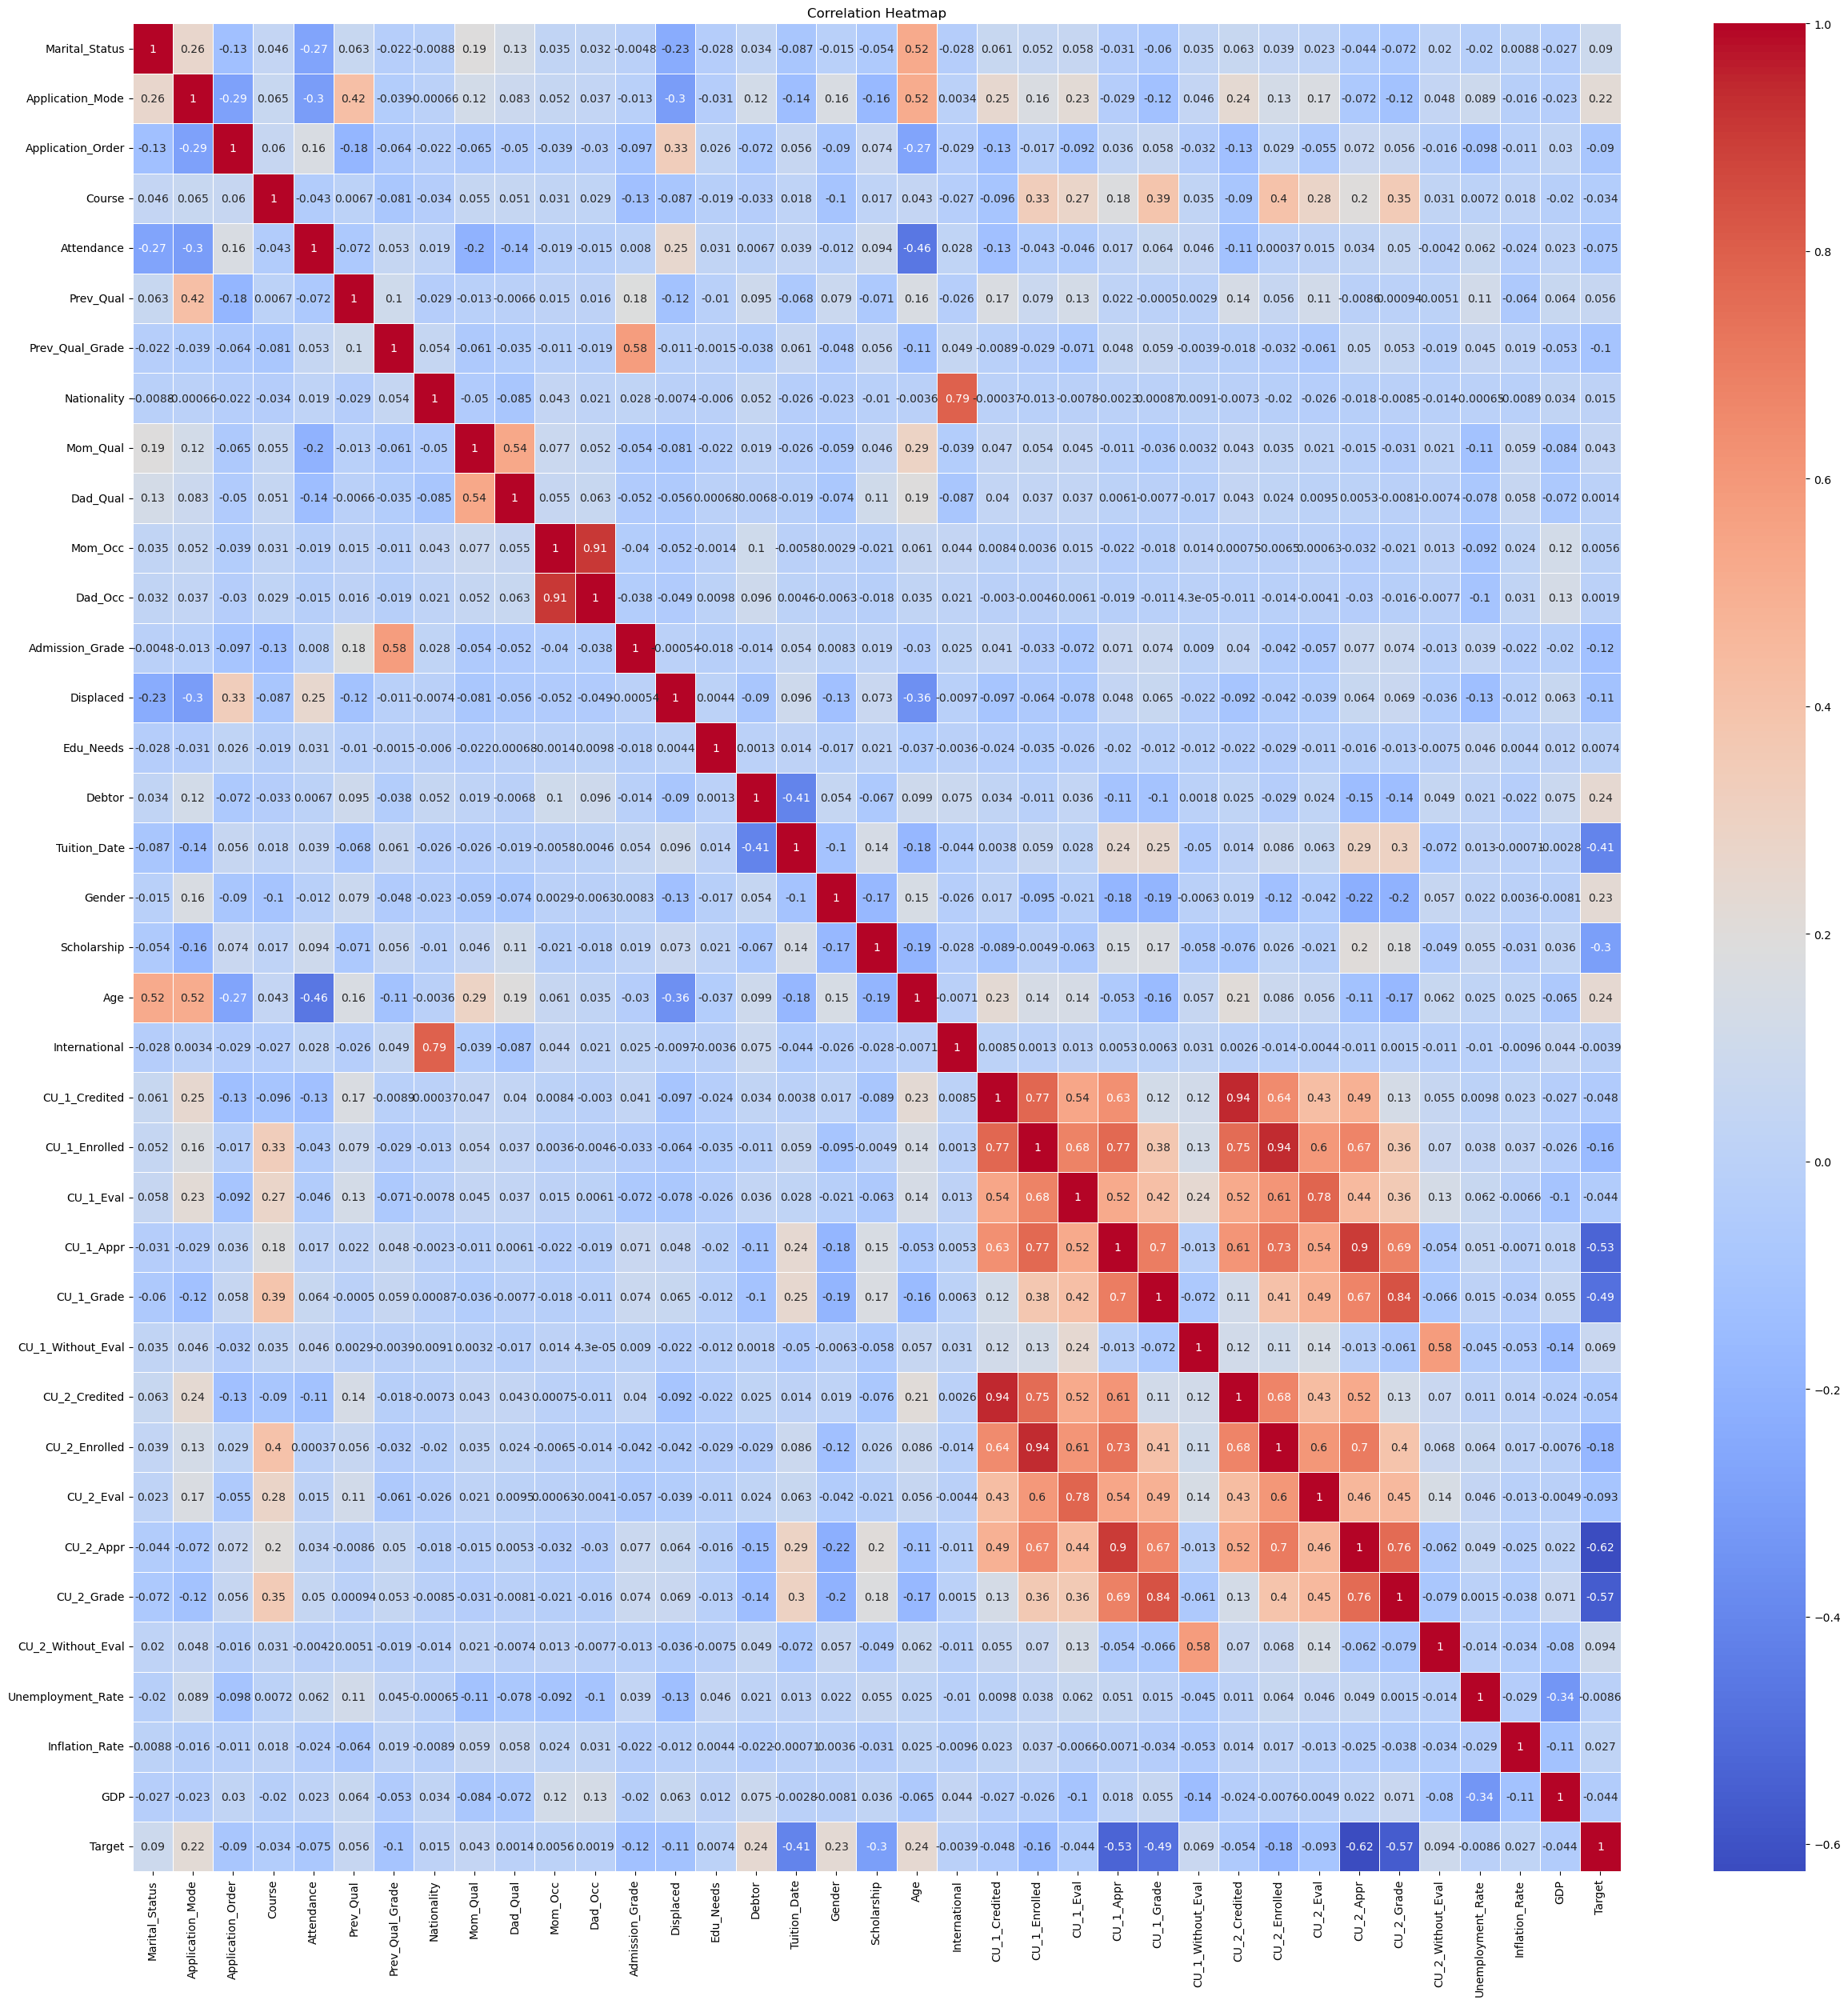

In [19]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(df.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [20]:
target_var = 'Target'
corr_threshold = 0.05

# Calculate correlations with the target variable
correlations = df.corr()[target_var]

# Find columns with absolute correlation lower than the threshold
low_corr_columns = correlations[abs(correlations) < corr_threshold].index

# Print the result
print("Columns with absolute correlation lower than 0.05 with the target variable:")
print(low_corr_columns)

Columns with absolute correlation lower than 0.05 with the target variable:
Index(['Course', 'Nationality', 'Mom_Qual', 'Dad_Qual', 'Mom_Occ', 'Dad_Occ',
       'Edu_Needs', 'International', 'CU_1_Credited', 'CU_1_Eval',
       'Unemployment_Rate', 'Inflation_Rate', 'GDP'],
      dtype='object')


In [21]:
# We will still keep the Semester Credit columns
new_idx = low_corr_columns.difference(['CU_1_Credited', 'CU_1_Eval'])

df_slashed = df.copy()

df_slashed = df_slashed.drop(columns=new_idx, axis=1)

In [22]:
new_idx

Index(['Course', 'Dad_Occ', 'Dad_Qual', 'Edu_Needs', 'GDP', 'Inflation_Rate',
       'International', 'Mom_Occ', 'Mom_Qual', 'Nationality',
       'Unemployment_Rate'],
      dtype='object')

In [23]:
# Define categorical and numerical features

numerical_features = ["Age", "Prev_Qual_Grade", "Admission_Grade", 'CU_1_Credited',
       'CU_1_Enrolled', 'CU_1_Eval', 'CU_1_Appr', 'CU_1_Grade',
       'CU_1_Without_Eval', 'CU_2_Credited', 'CU_2_Enrolled', 'CU_2_Eval',
       'CU_2_Appr', 'CU_2_Grade', 'CU_2_Without_Eval']

categorical_features = df_slashed.columns.difference(numerical_features)

In [24]:
categorical_features = categorical_features.drop("Target")

In [25]:
# Define the target variable and features
X = df.drop(['Target'], axis=1)
y = df['Target']

In [26]:
# # Split the data into training (80%) and temporary (20%)
X_train, X_holdout_temp, y_train, y_holdout_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the temporary data into holdout (10%) and testing (10%)
X_holdout, X_val_temp, y_holdout, y_val_temp = train_test_split(X_holdout_temp, y_holdout_temp, test_size=0.5, random_state=42)

# Further split the temporary data into testing (5%) and validation (5%)
X_test, X_val, y_test, y_val = train_test_split(X_val_temp, y_val_temp, test_size=0.5, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))
print("Validation set size:", len(X_val))
print("Holdout set size:", len(X_holdout))

Training set size: 3539
Testing set size: 221
Validation set size: 222
Holdout set size: 442


In [27]:
# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
y_train_resampled.value_counts()

Target
2    1791
1    1791
0    1791
Name: count, dtype: int64

In [28]:
X_train = X_train_resampled
y_train = y_train_resampled
y_train_resampled.value_counts()

Target
2    1791
1    1791
0    1791
Name: count, dtype: int64

Feature Engineering: Scaling, Normalization, and Standardization
These techniques can help to improve model performance, reduce the impact of outliers, and ensure that the data is on the same scale.

It is a good practice to fit the scaler on the training data and then use it to transform the testing data. This would avoid any data leakage during the model testing process. Also, the scaling of target values is generally not required.

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

In [29]:
# Creating a Pre-processing pipeline for One Hot Encoding and Standard Scaling

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create the classifier
log_reg = LogisticRegression(random_state=42)

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', log_reg)])
    
# Fit the model
pipe.fit(X_train, y_train)

# Predict on the test set
y_pred = pipe.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Classifier: Logistic Regression")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)
print("\n" + "="*50 + "\n")

Classifier: Logistic Regression
Accuracy: 0.7466
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       104
           1       0.54      0.53      0.54        49
           2       0.81      0.69      0.75        68

    accuracy                           0.75       221
   macro avg       0.72      0.70      0.71       221
weighted avg       0.75      0.75      0.74       221





/Applications/miniconda3/envs/ml-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We're getting a highest accuracy of ~ 74% if we use using feature selection and fixing class imbalance which is an improvement from the original paper which showed an accuracy of 68% using Logistic Regression.

In [30]:
# Evaluating a list of classifiers to create an ensemble using the best
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=2),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0),
    'XGBoost': XGBClassifier(objective='multi:softmax', num_class=len(set(y_train)), eval_metric='mlogloss'),
    'SVM': SVC(kernel='linear', probability=True)
}

# Create and evaluate pipelines for each classifier
for name, classifier in classifiers.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', classifier)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("\n" + "="*50 + "\n")

Classifier: Decision Tree
Accuracy: 0.7059
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81       104
           1       0.46      0.51      0.49        49
           2       0.77      0.68      0.72        68

    accuracy                           0.71       221
   macro avg       0.67      0.67      0.67       221
weighted avg       0.71      0.71      0.71       221



Classifier: Random Forest
Accuracy: 0.7466
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       104
           1       0.54      0.51      0.53        49
           2       0.84      0.71      0.77        68

    accuracy                           0.75       221
   macro avg       0.72      0.70      0.71       221
weighted avg       0.75      0.75      0.74       221



Classifier: Logistic Regression
Accuracy: 0.7466
Classification Report:
               precision    

/Applications/miniconda3/envs/ml-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: K-Nearest Neighbors
Accuracy: 0.6878
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.85      0.78       104
           1       0.50      0.61      0.55        49
           2       0.85      0.50      0.63        68

    accuracy                           0.69       221
   macro avg       0.69      0.65      0.65       221
weighted avg       0.71      0.69      0.68       221



Classifier: AdaBoost
Accuracy: 0.7104
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       104
           1       0.45      0.51      0.48        49
           2       0.81      0.63      0.71        68

    accuracy                           0.71       221
   macro avg       0.68      0.67      0.67       221
weighted avg       0.72      0.71      0.71       221



Classifier: XGBoost
Accuracy: 0.7511
Classification Report:
               precision    recall  f1-

In [31]:
# The top 4 classifiers were: XGBoost, Random Forest, Logistic Regression and SVM 
# We will use these to create the ensemble

# Create the top classifiers
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=len(set(y_train)), eval_metric='mlogloss')
rf_classifier = RandomForestClassifier(random_state=2)
lr_classifier = LogisticRegression(random_state=42)
svm_classifier = SVC(kernel='linear', probability=True)

# Train individual classifiers on the training set
# xgb_classifier.fit(X_train, y_train)
# rf_classifier.fit(X_train, y_train)
# lr_classifier.fit(X_train, y_train)
# svm_classifier.fit(X_train, y_train)

In [32]:
# Create a Voting Classifier with the trained individual classifiers

# Create preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  
    ])

# Hard Voting
voting_classifier = VotingClassifier(
    estimators=[
        ('xgb', xgb_classifier),
        ('rf', rf_classifier),
        ('lr', lr_classifier),
        ('svm', svm_classifier)
    ],
    voting='hard'
)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', voting_classifier)])

# Train the ensemble voting classifier on the holdout set
pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Ensemble Model:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

/Applications/miniconda3/envs/ml-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Model:
Accuracy: 0.7557
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       104
           1       0.55      0.53      0.54        49
           2       0.85      0.69      0.76        68

    accuracy                           0.76       221
   macro avg       0.73      0.71      0.72       221
weighted avg       0.76      0.76      0.75       221



In [33]:
# Soft Voting

voting_classifier = VotingClassifier(
    estimators=[
        ('xgb', xgb_classifier),
        ('rf', rf_classifier),
        ('lr', lr_classifier),
        ('svm', svm_classifier)
    ],
    voting='soft'
)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', voting_classifier)])

# Train the ensemble voting classifier on the holdout set
pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Ensemble Model:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

/Applications/miniconda3/envs/ml-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Model:
Accuracy: 0.7692
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86       104
           1       0.60      0.57      0.58        49
           2       0.80      0.72      0.76        68

    accuracy                           0.77       221
   macro avg       0.74      0.73      0.73       221
weighted avg       0.77      0.77      0.77       221



Hyperparameter tuning using grid search with cross-validation

In [88]:
# Create the top classifiers
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=len(set(y_train)), eval_metric='mlogloss')
rf_classifier = RandomForestClassifier(random_state=2)
lr_classifier = LogisticRegression(random_state=42)
svm_classifier = SVC(kernel='linear', probability=True)

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('xgb', xgb_classifier),
    ('rf', rf_classifier),
    ('lr', lr_classifier),
    ('svm', svm_classifier)
], voting='hard')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'xgb__n_estimators': [50, 100, 200],
    'rf__n_estimators': [50, 100, 200],
    'lr__C': [0.1, 1, 10],
    'svm__C': [0.1, 1, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=voting_classifier, param_grid=param_grid, scoring='f1_micro', cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_holdout, y_holdout)

# Get the best Voting Classifier from the grid search
best_voting_classifier = grid_search.best_estimator_

# Predictions on the validation set
y_val_pred = best_voting_classifier.predict(X_val)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy_val)

/Applications/miniconda3/envs/ml-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/miniconda3/envs/ml-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/envs/ml-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applicat

Validation Accuracy: 0.7162162162162162
Test Accuracy: 0.6923076923076923
